In [1]:
import networkx as nx
nodes = 100
seed=1000           # seed the graph for reproducibility, you should be doing this  
G= nx.gnp_random_graph (nodes, .02, seed=seed )       # here we create a random binomial graph with 10 nodes and an average (expected) connectivity of 10*.3= 3.
print ( G.nodes() )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [2]:
print(G.edges())

[(0, 35), (0, 54), (1, 25), (1, 44), (3, 90), (4, 47), (4, 56), (4, 82), (5, 50), (5, 80), (6, 30), (6, 68), (6, 69), (6, 75), (7, 13), (7, 29), (7, 38), (8, 47), (8, 56), (9, 65), (9, 92), (11, 56), (12, 29), (12, 45), (14, 55), (14, 64), (14, 65), (15, 97), (16, 44), (16, 73), (17, 45), (18, 85), (19, 55), (20, 24), (20, 71), (23, 53), (23, 90), (24, 39), (24, 47), (24, 80), (24, 93), (25, 26), (25, 39), (25, 74), (26, 35), (26, 39), (26, 45), (26, 61), (27, 56), (28, 34), (28, 53), (28, 54), (29, 30), (29, 48), (29, 60), (29, 71), (30, 61), (32, 46), (32, 67), (34, 47), (34, 51), (34, 80), (34, 81), (34, 92), (35, 78), (35, 85), (36, 45), (37, 43), (37, 78), (37, 86), (38, 59), (38, 63), (39, 42), (39, 48), (40, 96), (42, 57), (42, 66), (42, 75), (43, 56), (43, 58), (43, 98), (44, 55), (44, 87), (47, 59), (47, 76), (47, 79), (47, 85), (47, 98), (47, 99), (48, 83), (51, 99), (52, 72), (52, 81), (54, 59), (54, 74), (55, 72), (56, 93), (57, 94), (57, 99), (60, 76), (63, 90), (66, 83), 

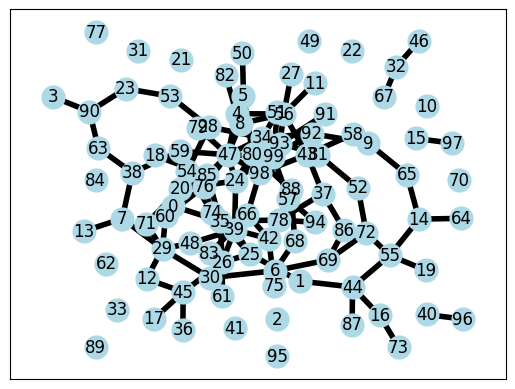

<Figure size 10000x2000 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import random
import string
links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G) 

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', linewidths=0.07) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels)
fig = plt.figure(figsize=(100,20))
plt.show()

# van description
- id: unique id for the car
- cur: current node
- path: queue that includes all nodes that are going to be visited
- S: schedule queue. It is a queue of tuples. Tuple has 3 items where:
    * `tuple[0]` passenger name
    * `tuple[1]` location point
    * `tuple[2]` status `0 = pickup` `1 = dropoff` `-1 = parked`
- clients: number of clients in the car

In [60]:
def generateUID():
    chars = ''.join(random.choices(string.ascii_uppercase, k=2))
    ints = ''.join(random.choices(string.digits, k=4))
    result = chars + ints
    return result
    
vans = [
    {'id':1,
     'cur':0,
    'path':[0,3,2],
    'S':[('p1',3,0),('p1',2,1)],
    'clients':1,
    'pending':[('p1',12,22)]
    },
    {'id':2,
     'cur':2,
    'path':[2,5,4],
    'S':[('p2',5,0),('p2',4,1)],
    'clients':1,
    'pending':[('p2',55,3)]
    },
    {'id':3,
     'cur':2,
    'path':[2],
    'S':[('p',2,-1)],
    'clients':0,
    'pending':[('p3',12,6)]
    }
]

def generateVans(number_of_nodes,n=1):
    arr = []
    for i in range(n):
        uid = generateUID()
        start = random.randint(0,number_of_nodes-1)
        arr.append({'id':uid,
                    'cur':start,
                    'path':[start],
                    'S':[('',start,-1)],
                    'clients':0,
                    'pending':[]
                })
    return arr
    
# vans = generateVans(100,10)
# for v in vans:
#     print(v)


# print(vans[0]['path'])
# print(vans[0]['path'])
# vans[0]['path'].pop(0)
# print(vans[0]['path'])

In [61]:
#updates path for next points
def updatePath(van,newNodes):
    return van['path']+newNodes[1:]

def updateS(van):
    pass

# R is a list of requests
R = []
#generates n number of new requests
def generateOrders(number_of_nodes,R, n=1):
    newR = R
    counter = 0
    while counter<n:
        pickup = random.randint(0,number_of_nodes-1)
        dropoff = random.randint(0,number_of_nodes-1)
        #check if nodes have path
        if nx.has_path(G,pickup,dropoff):
            p = generateUID()
            newR.append((p,pickup,dropoff))
            counter+=1
    return newR


# R=generateOrders(100,R,4)
# print(R)

#testing
#update path
# van = updatePath(vans[0],[6,7,8,10])
# print(van)

In [62]:
def dist(a,b):
  path = nx.shortest_path(G,a,b,weight='weight',method='dijkstra')
  return len(path)

print(dist(17,6))

def schedule(v,p,state):
  if state == 0: #picku[]
    path = nx.shortest_path(G,v['path'][-1],p[1],weight='weight',method='dijkstra')
    #check if parked
    if v['S'][0][2]==-1:
      v['S'].pop(0)
    v['S'].append((p[0],p[1],0))
    v['path']=updatePath(v,path)
  elif state == 1:
    path = nx.shortest_path(G,v['path'][-1],p[2],weight='weight',method='dijkstra')
    #check if parked
    if v['S'][0][2]==-1:
      v['S'].pop(0)
    v['S'].append((p[0],p[2],1))
    v['path']=updatePath(v,path)    
  return v




7


Simulation start here

In [63]:
import time


#TODO
#generate vans here
vans = generateVans(nodes,30)
for i in vans:
  print(i)

print("Timer started")
# Define the timer duration (20 minutes)
duration = 20 * 60

total_distance = 0
total_trips = 0

# Start the timer
start = time.time()
elapsed_time=start
# Loop until elapsed time reaches the duration
while (elapsed_time - start) < duration:
    # Calculate elapsed time
    current_minute = int((elapsed_time - start) / 60) + 1
    # Sleep for 1 minute
    time.sleep(60)
    elapsed_time = time.time()
    # Print a message every minute
    print(f"\nMinute {current_minute} elapsed")            

    if  current_minute % 4 == 0:
        print(f"Minute {current_minute} elapsed")
        R = generateOrders(nodes,R,30)
        print(R)
        while len(R)>0:
            #find closest driver
            d={}
            #number of unreached
            nu = 0
            for i in range(len(vans)):
                if nx.has_path(G,vans[i]['path'][-1],R[0][1]):
                    if vans[i]['clients']<3:
                        cur = len(nx.shortest_path(G,vans[i]['path'][-1],R[0][1],weight='weight',method='dijkstra'))
                        d[cur]=i
                    else:
                        # if full -> skip iteration
                        continue
                else:
                    print('no path found to van '+str(vans[i]))
                    nu+=1
                        
            #check if vans cant go there
            if len(vans)==nu:
              nu=0
              print('vans dont go there')
              R.pop(0)
            else:
              if len(d)>0:
                smallest_key = min(d.keys())
                #index of the closest driver
                van_index = d[smallest_key]
                print('closest van is: '+ str(vans[van_index]))
                vans[van_index]['clients']+=1
                vans[van_index]['pending'].append(R[0])
                print(str(vans[van_index])+' updated')
                total_trips+=1
                R.pop(0)
                print('order was popped from R '+str(R)+'\n')
              else:
                break
       
                
        # iterate through drivers again and schedule everything
        for i in range(len(vans)):
            if len(vans[i]['pending'])==1:
              print('\n\n1p case')
              #popping parking state
              vans[i]['S'].pop(0)
              pending = vans[i]['pending']
              print('\n\n\n van before update'+str(vans[i]))
              path1 = nx.shortest_path(G,vans[i]['path'][-1],pending[0][1],weight='weight',method='dijkstra')
              vans[i]['S'].append((pending[0][0],pending[0][1],0))
              vans[i]['path']=updatePath(vans[i],path1)
              print('pickup spot added')

              #finding shortest path
              path2 = nx.shortest_path(G,vans[i]['path'][-1],pending[0][2],weight='weight',method='dijkstra')
              #updating S
              vans[i]['S'].append((pending[0][0],pending[0][2],1))
              #updating path
              vans[i]['path']=updatePath(vans[i],path2)
              #deleting pending after pickup and dropoff scheduled
              vans[i]['pending'].pop(0)

              print('dropoff spot added')
              print(vans[i])
                
            elif len(vans[i]['pending'])==2:
              print('\n\n 2p case')
              print(vans[i])
              p1 = vans[i]['pending'][0]
              p2 =  vans[i]['pending'][1]
              #p1 and p2 structure: (id, pickup, dropoff)
              w = vans[i]['path'][-1]

              # if dist(w,p2[1])+dist(p1[1],p2[1]<dist(w,p1[1])):
              if dist(w,p2[1])<dist(w,p1[1]):
                #pickup p2
                print('p p2')
                vans[i] = schedule(vans[i],p2,0)
                # path = nx.shortest_path(G,w,p2[1],weight='weight',method='dijkstra')
                # vans[i]['S'].append((p2[0],p2[1],0))
                # vans[i]['path']=updatePath(vans[i],path)

                #check if p1 has to be picked up before dropping off p2
                if dist(w,p1[1])<dist(w,p2[2])+dist(p2[2],p1[1]):
                  #pick up p1
                  print('p p1')
                  vans[i] = schedule(vans[i],p1,0)
                  if dist(w,p1[2])<dist(w,p2[2]):
                    print('d p1')
                    print('d p2')
                    #dropoff p1 first
                    vans[i] = schedule(vans[i],p1,1)
                    #dropoff p2 
                    vans[i] = schedule(vans[i],p2,1)
                  else:
                    print('d p2')
                    print('d p1')
                    #dropoff p2 first
                    vans[i] = schedule(vans[i],p2,1)
                    #dropoff p1
                    vans[i] = schedule(vans[i],p1,1)
                else:
                  print('d p2')
                  print('p p1')
                  print('d p1')
                  #dropping off p2 first
                  vans[i] = schedule(vans[i],p2,1)
                  #pickup p1

                  vans[i]=schedule(vans[i],p1,0)
                  #dropoff p1 after picking up p1
                  vans[i] = schedule(vans[i],p1,1)

              else:
              #check if p2 has to be picked up before dropping off p1              
              #elif dist(w,p1[1])>dist(w,p2[1])+dist(p2[1],p1[1]):
                #pickup p1 first
                print('p p1')
                vans[i] = schedule(vans[i],p1,0)
                if dist(w,p2[1])<dist(w,p1[2])+dist(p1[2],p2[1]):
                  #pickup p2
                  print('p p2')
                  vans[i] = schedule(vans[i],p2,0)
                  if dist(w,p1[2])<dist(w,p2[2]):
                    print('d p1')
                    print('d p2')
                    #dropoff p1 first
                    vans[i] = schedule(vans[i],p1,1)
                    #dropoff p2 
                    vans[i] = schedule(vans[i],p2,1)
                  else:
                    print('d p2')
                    print('d p1')
                    #dropoff p2 first
                    vans[i] = schedule(vans[i],p2,1)
                    #dropoff p1
                    vans[i] = schedule(vans[i],p1,1)
                else:

                  #dropping off p1 first
                  vans[i] = schedule(vans[i],p1,1)
                  print('d p1')
                  #pickup p2
                  print('p p2')
                  vans[i]=schedule(vans[i],p2,0)
                  #dropoff p1 after picking up p1
                  vans[i] = schedule(vans[i],p2,1)
                  print('d p2')

              #clearing pending buffer after shceduling is done                         ]
              vans[i]['pending'].pop(0)
              vans[i]['pending'].pop(0)
              print('scheduling done: '+str(vans[i]))
                
            elif len(vans[i]['pending'])==3:
              print('schedule 3 p')
              p1 = vans[i]['pending'][0]
              p2 =  vans[i]['pending'][1]
              p3 =  vans[i]['pending'][2]
              w = vans[i]['path'][-1]

              # check if p1 has to be picked up before p2 and p3
              if dist(w,p1[1])<dist(w,p2[1])+dist(p2[1],p1[1]):
                #pickup p1
                print('picking up p1')
                vans[i] = schedule(vans[i],p1,0)
                #check if p2 has to be picked up before p3
                if dist(w,p2[1])<dist(w,p3[1])+dist(p3[1],p2[1]):
                  #pickup p2
                  print('picking up p2')
                  vans[i] = schedule(vans[i],p2,0)
                  #check if p3 has to be picked up before p1
                  if dist(w,p3[1])<dist(w,p1[2])+dist(p1[2],p3[1]):
                    #pickup p3
                    print('picking up p3')
                    vans[i] = schedule(vans[i],p3,0)
                    #check if p1 has to be dropped off before p2
                    if dist(w,p1[2])<dist(w,p2[2])+dist(p2[2],p1[2]):
                      #dropoff p1
                      print('dropping off p1')
                      vans[i] = schedule(vans[i],p1,1)
                      #check if p2 has to be dropped off before p3
                      if dist(w,p2[2])<dist(w,p3[2])+dist(p3[2],p2[2]):
                        #dropoff p2
                        print('dropping off p2')
                        vans[i] = schedule(vans[i],p2,1)
                        #dropoff p3
                        print('dropping off p3')
                        vans[i] = schedule(vans[i],p3,1)
                      else:
                        #dropoff p3
                        print('dropping off p3')
                        vans[i] = schedule(vans[i],p3,1)
                        #dropoff p2
                        print('dropping off p2')
                        vans[i] = schedule(vans[i],p2,1)
                    else:
                      #dropoff p2
                      print('dropping off p2')
                      vans[i] = schedule(vans[i],p2,1)
                      #check if p1 has to be dropped off before p3
                      if dist(w,p1[2])<dist(w,p3[2])+dist(p3[2],p1[2]):
                        #dropoff p1
                        print('dropping off p1')
                        vans[i] = schedule(vans[i],p1,1)
                        #dropoff p3
                        print('dropping off p3')
                        vans[i] = schedule(vans[i],p3,1)
                      else:
                        #dropoff p3
                        print('dropping off p3')
                        vans[i] = schedule(vans[i],p3,1)
                        #dropoff p1
                        print('dropping off p1')
                        vans[i] = schedule(vans[i],p1,1)
                  else:
                    #pickup p1
                    print('picking up p1')
                    vans[i] = schedule(vans[i],p1,0)
                    #check if p2 has to be dropped off before p3
                    if dist(w,p2[2])<dist(w,p3[2])+dist(p3[2],p2[2]):
                      #dropoff p2
                      print('dropping off p2')
                      vans[i] = schedule(vans[i],p2,1)
                      #dropoff p3
                      print('dropping off p3')
                      vans[i] = schedule(vans[i],p3,1)
                    else:
                      #dropoff p3
                      print('dropping off p3')
                      vans[i] = schedule(vans[i],p3,1)
                      #dropoff p2
                      print('dropping off p2')
                      vans[i] = schedule(vans[i],p2,1)
                else:
                  #pickup p3
                  print('picking up p3')
                  vans[i] = schedule(vans[i],p3,0)
                  #check if p1 has to be dropped off before p2
                  if dist(w,p1[2])<dist(w,p2[2])+dist(p2[2],p1[2]):
                    #dropoff p1
                    print('dropping off p1')
                    vans[i] = schedule(vans[i],p1,1)
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)
                  else:
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)
                    #dropoff p1
                    print('dropping off p1')
                    vans[i] = schedule(vans[i],p1,1)
              else: #check if p2 has to be picked up before p1 and p3
                #pickup p2
                print('picking up p2')
                vans[i] = schedule(vans[i],p2,0)
                #check if p3 has to be picked up before p1
                if dist(w,p3[1])<dist(w,p1[1])+dist(p1[1],p3[1]):
                  #pickup p3
                  print('picking up p3')
                  vans[i] = schedule(vans[i],p3,0)
                  #check if p1 has to be dropped off before p2
                  if dist(w,p1[2])<dist(w,p2[2])+dist(p2[2],p1[2]):
                    #dropoff p1
                    print('dropping off p1')
                    vans[i] = schedule(vans[i],p1,1)
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)
                  else:
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)
                    #dropoff p1
                    print('dropping off p1')
                    vans[i] = schedule(vans[i],p1,1)
                else:
                  #pickup p1
                  print('picking up p1')
                  vans[i] = schedule(vans[i],p1,0)
                  #check if p2 has to be dropped off before p3
                  if dist(w,p2[2])<dist(w,p3[2])+dist(p3[2],p2[2]):
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)
                    #dropoff p3
                    print('dropping off p3')
                    vans[i] = schedule(vans[i],p3,1)
                  else:
                    #dropoff p3
                    print('dropping off p3')
                    vans[i] = schedule(vans[i],p3,1)
                    #dropoff p2
                    print('dropping off p2')
                    vans[i] = schedule(vans[i],p2,1)

                    
              #clearing pending buffer after shceduling is done                         ]
              vans[i]['pending'].pop(0)
              vans[i]['pending'].pop(0)
              vans[i]['pending'].pop(0)
              print('scheduling done: '+str(vans[i]))
              
    #update cars locations:
    for v in vans:
        if len(v['path'])==1 and v['S'][0][2]==-1 and (v['S'][0][1]==v['path'][0]) and v['clients']==0:
            print('van '+str(v['id']) +' is parked')
        else:
            if current_minute % 2 == 0:
                #reached node so update cur
                v['cur']=v['path'][0]
                total_distance+=1
                #if van is on pickup or dropoff point
                if v['path'][0]==v['S'][0][1]:
                    
                    if v['S'][0][2]==0:
                        print('van '+str(v['id']) +' picked up ' + v['S'][0][0])
                    else:
                        print('van '+str(v['id']) +' dropped off ' + v['S'][0][0])
                        v['clients']-=1
                        
                    #if it is a last stop -> pop it and park. else -> pop it and go on
                    if len(v['S'])==1:
                        print('finished orders. Van is now parked')
                        v['S'].pop(0)
                        v['S'].append(('',v['path'][0],-1))
                    else:
                        v['S'].pop(0)
                        print('stops left'+str(v['S'])+'')

            #if car not parked and is on the node
            if v['S'][0][2]>-1 and v['cur']!=-1:
                v['path'].pop(0)
                v['cur']=-1
                
            print('van '+str(v) +' is on its way. path left: '+str(v['path']))
average_distance = total_distance/len(vans)
average_trips = total_trips/len(vans)
print("Timer finished")
print('Average distance traveled: '+str(average_distance))
print('Average trips made: '+str(average_trips))


{'id': 'KH0968', 'cur': 0, 'path': [0], 'S': [('', 0, -1)], 'clients': 0, 'pending': []}
{'id': 'KF8566', 'cur': 4, 'path': [4], 'S': [('', 4, -1)], 'clients': 0, 'pending': []}
{'id': 'YN1195', 'cur': 43, 'path': [43], 'S': [('', 43, -1)], 'clients': 0, 'pending': []}
{'id': 'RE4108', 'cur': 73, 'path': [73], 'S': [('', 73, -1)], 'clients': 0, 'pending': []}
{'id': 'EW6125', 'cur': 82, 'path': [82], 'S': [('', 82, -1)], 'clients': 0, 'pending': []}
{'id': 'RC7395', 'cur': 34, 'path': [34], 'S': [('', 34, -1)], 'clients': 0, 'pending': []}
{'id': 'PF7933', 'cur': 45, 'path': [45], 'S': [('', 45, -1)], 'clients': 0, 'pending': []}
{'id': 'XZ8561', 'cur': 40, 'path': [40], 'S': [('', 40, -1)], 'clients': 0, 'pending': []}
{'id': 'TW4458', 'cur': 75, 'path': [75], 'S': [('', 75, -1)], 'clients': 0, 'pending': []}
{'id': 'UV6597', 'cur': 68, 'path': [68], 'S': [('', 68, -1)], 'clients': 0, 'pending': []}
{'id': 'LQ6975', 'cur': 99, 'path': [99], 'S': [('', 99, -1)], 'clients': 0, 'pending'